In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
import plotly.express as px
import warnings



# 1st Extract Data 

In [2]:
df = pd.read_csv("C:\\Users\\user\\3D Objects\\Exploratory-Data-Analysis-EDA-\\EDA_amazon_data\\Amazon_Sale_Report\\Amazon_Sale_Report.csv", low_memory=False)
df.head(10)

index             Order ID      Date                        Status   
0      0  405-8078784-5731545  04-30-22                     Cancelled  \
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   
5      5  404-1490984-4578765  04-30-22                       Shipped   
6      6  408-5748499-6859555  04-30-22                       Shipped   
7      7  406-7807733-3785945  04-30-22  Shipped - Delivered to Buyer   
8      8  407-5443024-5233168  04-30-22                     Cancelled   
9      9  402-4393761-0311520  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style                  SKU   
0   Merchant      Amazon.in           Standard   SET389       SET389-KR-NP-S  \
1   Merchant      Amazon.in           Standard  JNE3781      JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371        JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341           J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671      JNE3671-TU-XXXL   
5     Amazon      Amazon.in          Expedited   SET264      SET264-KR-NP-XL   
6     Amazon      Amazon.in          Expedited    J0095          J0095-SET-L   
7   Merchant      Amazon.in           Standard  JNE3405         JNE3405-KR-S   
8     Amazon      Amazon.in          Expedited   SET200  SET200-KR-NP-A-XXXL   
9     Amazon      Amazon.in          Expedited  JNE3461       JNE3461-KR-XXL   

        Category  ... currency  Amount    ship-city     ship-state   
0            Set  ...      INR  647.62       MUMBAI    MAHARASHTRA  \
1          kurta  ...      INR  406.00    BENGALURU      KARNATAKA   
2          kurta  ...      INR  329.00  NAVI MUMBAI    MAHARASHTRA   
3  Western Dress  ...      INR  753.33   PUDUCHERRY     PUDUCHERRY   
4            Top  ...      INR  574.00      CHENNAI     TAMIL NADU   
5            Set  ...      INR  824.00    GHAZIABAD  UTTAR PRADESH   
6            Set  ...      INR  653.00   CHANDIGARH     CHANDIGARH   
7          kurta  ...      INR  399.00    HYDERABAD      TELANGANA   
8            Set  ...      NaN     NaN    HYDERABAD      TELANGANA   
9          kurta  ...      INR  363.00      Chennai     TAMIL NADU   

  ship-postal-code  ship-country   
0         400081.0            IN  \
1         560085.0            IN   
2         410210.0            IN   
3         605008.0            IN   
4         600073.0            IN   
5         201102.0            IN   
6         160036.0            IN   
7         500032.0            IN   
8         500008.0            IN   
9         600041.0            IN   

                                       promotion-ids    B2B  fulfilled-by   
0                                                NaN  False     Easy Ship  \
1  Amazon PLCC Free-Financing Universal Merchant ...  False     Easy Ship   
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True           NaN   
3                                                NaN  False     Easy Ship   
4                                                NaN  False           NaN   
5       IN Core Free Shipping 2015/04/08 23-48-5-108  False           NaN   
6       IN Core Free Shipping 2015/04/08 23-48-5-108  False           NaN   
7  Amazon PLCC Free-Financing Universal Merchant ...  False     Easy Ship   
8       IN Core Free Shipping 2015/04/08 23-48-5-108  False           NaN   
9                                                NaN  False           NaN   

  Unnamed: 22  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9         NaN  

[10 rows x 24 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
duplicate_counts = {col: len(df) - df[col].nunique() for col in df.columns}

for col, count in duplicate_counts.items():
    print(f"Column: {col}, Duplicate Values: {count}")


Column: index, Duplicate Values: 0
Column: Order ID, Duplicate Values: 8597
Column: Date, Duplicate Values: 128884
Column: Status, Duplicate Values: 128962
Column: Fulfilment, Duplicate Values: 128973
Column: Sales Channel , Duplicate Values: 128973
Column: ship-service-level, Duplicate Values: 128973
Column: Style, Duplicate Values: 127598
Column: SKU, Duplicate Values: 121780
Column: Category, Duplicate Values: 128966
Column: Size, Duplicate Values: 128964
Column: ASIN, Duplicate Values: 121785
Column: Courier Status, Duplicate Values: 128972
Column: Qty, Duplicate Values: 128965
Column: currency, Duplicate Values: 128974
Column: Amount, Duplicate Values: 127565
Column: ship-city, Duplicate Values: 120020
Column: ship-state, Duplicate Values: 128906
Column: ship-postal-code, Duplicate Values: 119516
Column: ship-country, Duplicate Values: 128974
Column: promotion-ids, Duplicate Values: 123188
Column: B2B, Duplicate Values: 128973
Column: fulfilled-by, Duplicate Values: 128974
Column:

In [5]:
df[["index","currency","ship-country","fulfilled-by","Unnamed: 22","promotion-ids"]].nunique()

index            128975
currency              1
ship-country          1
fulfilled-by          1
Unnamed: 22           1
promotion-ids      5787
dtype: int64

<Axes: >

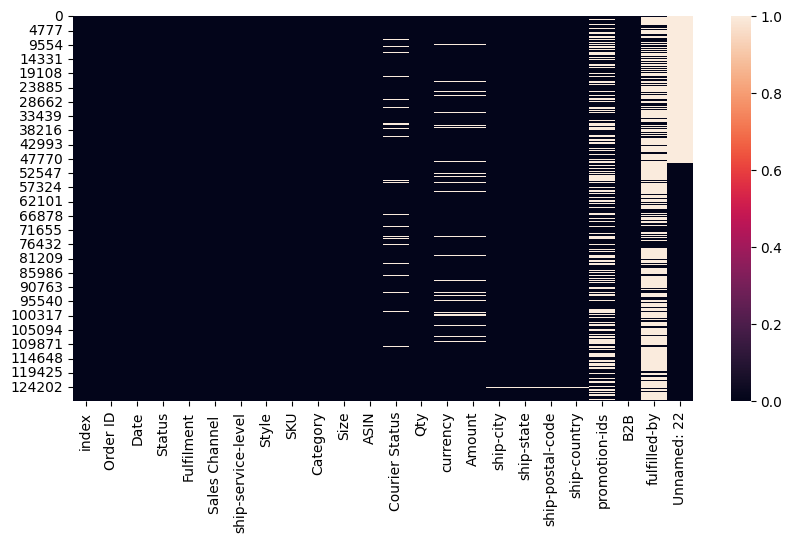

In [6]:
miss_values = [f for f in df.columns if df[f].isnull().sum()>0]
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=True)

In [7]:
miss_values = [f for f in df.columns if df[f].isnull().sum()>0]
miss_values

['Courier Status',
 'currency',
 'Amount',
 'ship-city',
 'ship-state',
 'ship-postal-code',
 'ship-country',
 'promotion-ids',
 'fulfilled-by',
 'Unnamed: 22']

In [8]:
df.describe()

index            Qty         Amount  ship-postal-code
count  128975.000000  128975.000000  121180.000000     128942.000000
mean    64487.000000       0.904431     648.561465     463966.236509
std     37232.019822       0.313354     281.211687     191476.764941
min         0.000000       0.000000       0.000000     110001.000000
25%     32243.500000       1.000000     449.000000     382421.000000
50%     64487.000000       1.000000     605.000000     500033.000000
75%     96730.500000       1.000000     788.000000     600024.000000
max    128974.000000      15.000000    5584.000000     989898.000000

In [9]:
numerical_data = df.select_dtypes(include=['number'])


In [10]:
def central_tendency(df):
    for column in df.columns:
        print(f"Column: {column}")
        print(f"Mean : {df[column].mean()}")
        print(f"Median : {df[column].median()}")
        print(f"Mode : {df[column].mode()[0]},\n")

central_tendency(numerical_data)

Column: index
Mean : 64487.0
Median : 64487.0
Mode : 0,

Column: Qty
Mean : 0.9044310912967629
Median : 1.0
Mode : 1,

Column: Amount
Mean : 648.5614647631621
Median : 605.0
Mode : 399.0,

Column: ship-postal-code
Mean : 463966.2365094384
Median : 500033.0
Mode : 201301.0,



In [11]:
def check_skewness(df):
    skewness = {}
    for column in df.columns:
        skew_value = skew(df[column].dropna())
        if abs(skew_value) > 2:
            skewness[column] = 'Highly Skewed'
        elif abs(skew_value) > 1:
            skewness[column] = 'Moderately Skewed'
        else:
            skewness[column] = 'Lightly Skewed'
    return skewness

skewness_info = check_skewness(numerical_data)


skewness_info

{'index': 'Lightly Skewed',
 'Qty': 'Lightly Skewed',
 'Amount': 'Lightly Skewed',
 'ship-postal-code': 'Lightly Skewed'}

In [12]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_info = detect_outliers_iqr(numerical_data)

print(outliers_info)

{'index': Empty DataFrame
Columns: [index, Qty, Amount, ship-postal-code]
Index: [], 'Qty':          index  Qty  Amount  ship-postal-code
0            0    0  647.62          400081.0
3            3    0  753.33          605008.0
8            8    0     NaN          500008.0
23          23    0  570.48          411044.0
29          29    0     NaN          781003.0
...        ...  ...     ...               ...
128907  128907    0     NaN          201306.0
128908  128908    0     NaN          201306.0
128956  128956    2  992.00          600042.0
128958  128958    0     NaN          560037.0
128967  128967    0     NaN          700040.0

[13195 rows x 4 columns], 'Amount':          index  Qty  Amount  ship-postal-code
102        102    1  1338.0          421502.0
146        146    1  1399.0          225001.0
243        243    1  1338.0          700051.0
265        265    2  2130.0          400101.0
299        299    1  1463.0          401107.0
...        ...  ...     ...               .

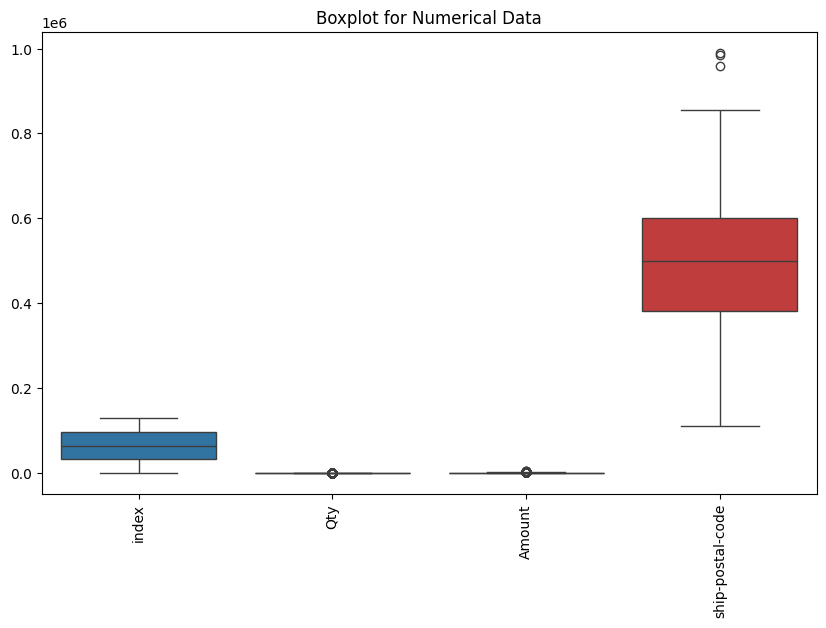

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_data)
plt.title("Boxplot for Numerical Data")
plt.xticks(rotation=90)  
plt.show()

In [14]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

scaled_data_standard = scaler_standard.fit_transform(numerical_data)
scaled_data_minmax = scaler_minmax.fit_transform(numerical_data)

In [15]:
scaled_data_standard

array([[-1.73203738, -2.88630684, -0.0033479 , -0.33364614],
       [-1.73201052,  0.30498862, -0.86256182,  0.50198851],
       [-1.73198366,  0.30498862, -1.13637803, -0.28074657],
       ...,
       [ 1.73198366,  0.30498862,  0.1473577 ,  0.18844534],
       [ 1.73201052,  0.30498862,  1.95738951, -0.38968971],
       [ 1.73203738,  0.30498862,  0.16869402,  0.14648186]])

In [16]:
scaled_data_minmax

array([[0.00000000e+00, 0.00000000e+00, 1.15977794e-01, 3.29674951e-01],
       [7.75350071e-06, 6.66666667e-02, 7.27077364e-02, 5.11518962e-01],
       [1.55070014e-05, 6.66666667e-02, 5.89183381e-02, 3.41186525e-01],
       ...,
       [9.99984493e-01, 6.66666667e-02, 1.23567335e-01, 4.43288249e-01],
       [9.99992246e-01, 6.66666667e-02, 2.14720630e-01, 3.17479205e-01],
       [1.00000000e+00, 6.66666667e-02, 1.24641834e-01, 4.34156498e-01]])

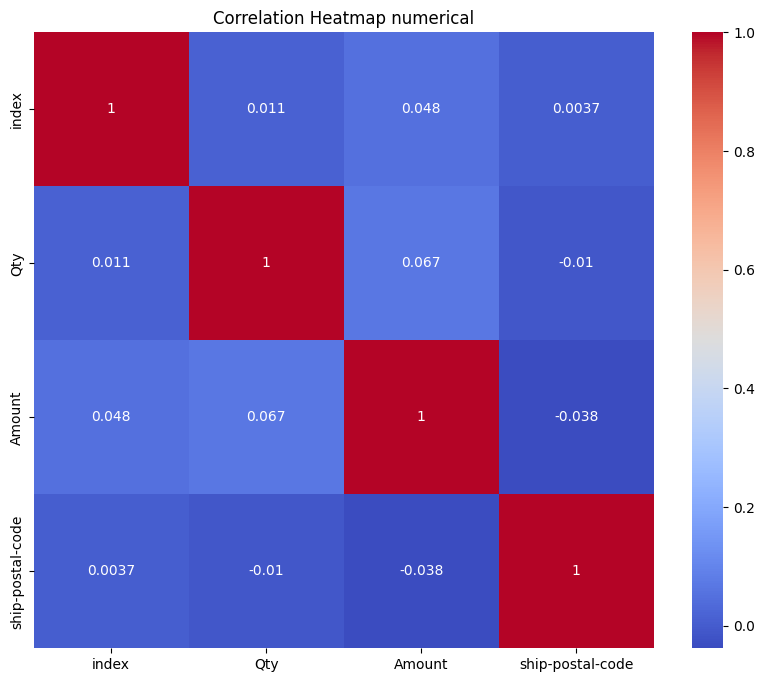

In [17]:
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap numerical")
plt.show()

In [38]:
categorical_data = df.select_dtypes(exclude=['number'])

categorical_data.sample(5)

Order_ID       Date     Status Fulfilment Sales_Channel   
61942   406-1378104-9277166 2022-05-21    Shipped     Amazon     Amazon.in  \
107350  406-9772642-3235539 2022-06-15    Shipped     Amazon     Amazon.in   
88814   404-3019290-1599521 2022-05-02    Shipped     Amazon     Amazon.in   
128724  171-8033179-4719562 2022-06-01    Shipped     Amazon     Amazon.in   
49204   408-0719632-9805944 2022-05-31  Cancelled     Amazon     Amazon.in   

       ship-service-level    Style               SKU       Category Size   
61942           Expedited   SET116  SET116-KR-NP-XXL            Set  XXL  \
107350          Expedited  MEN5022      MEN5022-KR-S          kurta    S   
88814           Expedited  JNE3879    JNE3879-DR-XXL  Western Dress  XXL   
128724          Expedited  JNE3440     JNE3440-KR-XL          kurta   XL   
49204           Expedited    J0301        J0301-TP-L            Top    L   

              ASIN Courier_Status    ship-city     ship-state    B2B  
61942   B082Z438ZS        Shipped  NAVI MUMBAI    MAHARASHTRA  False  
107350  B08YYT4GQJ        Shipped    HYDERABAD      TELANGANA  False  
88814   B09SDZ9BRQ        Shipped  NAVI MUMBAI    MAHARASHTRA  False  
128724  B081WPK66G        Shipped     AZAMGARH  UTTAR PRADESH  False  
49204   B099S6795L      Cancelled   COIMBATORE     TAMIL NADU  False

# 2nd Transfrom Data

In [19]:
df.drop(columns=["index","currency","ship-country","fulfilled-by","Unnamed: 22","promotion-ids"], inplace=True)

df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B'],
      dtype='object')

In [20]:
df.drop_duplicates().sample(10)

Order ID      Date                        Status   
17653   405-3304814-1312365  04-20-22  Shipped - Delivered to Buyer  \
72026   405-2795118-3554708  05-13-22                       Shipped   
75956   402-2293472-8689108  05-09-22                     Cancelled   
29146   403-6061453-7833946  04-13-22                       Shipped   
110443  404-6365979-0525950  06-13-22  Shipped - Delivered to Buyer   
45408   402-6526846-9482727  04-03-22  Shipped - Delivered to Buyer   
118648  403-4932401-8948307  06-07-22                       Shipped   
65788   407-5563434-9437927  05-18-22                       Shipped   
118814  404-6246445-7300312  06-07-22                       Shipped   
37406   407-2643979-1612324  04-08-22                       Shipped   

       Fulfilment Sales Channel  ship-service-level    Style   
17653    Merchant      Amazon.in           Standard  JNE3728  \
72026      Amazon      Amazon.in          Expedited  JNE3368   
75956    Merchant      Amazon.in           Standard    J0001   
29146      Amazon      Amazon.in          Expedited   SET290   
110443   Merchant      Amazon.in           Standard    J0301   
45408    Merchant      Amazon.in           Standard  JNE3440   
118648     Amazon      Amazon.in          Expedited    NW016   
65788      Amazon      Amazon.in          Expedited  JNE3543   
118814     Amazon      Amazon.in          Expedited  MEN5023   
37406      Amazon      Amazon.in          Expedited  JNE3399   

                      SKU      Category Size        ASIN Courier Status  Qty   
17653        JNE3728-KR-L         kurta    L  B09811C3GN        Shipped    1  \
72026        JNE3368-KR-M         kurta    M  B081XDBBSH        Shipped    1   
75956          J0001-DR-L  Ethnic Dress    L  B0894XPW4B            NaN    0   
29146    SET290-KR-DPT-XL           Set   XL  B09B58186F        Shipped    1   
110443         J0301-TP-M           Top    M  B099S9DTR2        Shipped    1   
45408   JNE3440-KR-N-XXXL         kurta  3XL  B09HMTKV2L        Shipped    1   
118648   NW016-ST-SR-XXXL           Set  3XL  B099NSBYRS        Shipped    1   
65788        JNE3543-KR-S         kurta    S  B08HHJP41L        Shipped    1   
118814      MEN5023-KR-XL         kurta   XL  B08YZ22Q6R        Shipped    1   
37406        JNE3399-KR-M         kurta    M  B082W84Q2J        Shipped    1   

        Amount   ship-city       ship-state  ship-postal-code    B2B  
17653   329.00    VADODARA          Gujarat          390007.0  False  
72026   471.00  BARHALGANJ    UTTAR PRADESH          273402.0  False  
75956   657.14     CHENNAI       TAMIL NADU          600061.0  False  
29146   725.00  PUDUCHERRY       PUDUCHERRY          605110.0  False  
110443  693.00    REHAMBAL  JAMMU & KASHMIR          182121.0  False  
45408   379.00     Chennai       TAMIL NADU          600028.0  False  
118648  537.00   SHYAMDHAN      WEST BENGAL          734427.0  False  
65788   368.00   HYDERABAD        TELANGANA          500015.0  False  
118814  754.00       SURAT          Gujarat          395007.0  False  
37406   435.00   Hyderabad        TELANGANA          500039.0  False

In [21]:
df.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status        6872
Qty                      0
Amount                7795
ship-city               33
ship-state              33
ship-postal-code        33
B2B                      0
dtype: int64

In [22]:
df.rename(columns={"Sales Channel" : "Sales_Channel", "Courier Status" : "Courier_Status", "Order ID" : "Order_ID" }, inplace=True)

df.columns

Index(['Order_ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B'],
      dtype='object')

In [23]:
df.columns = df.columns.str.strip()

df.rename(columns={'Sales Channel': 'Sales_Channel'}, inplace=True)

df.columns


Index(['Order_ID', 'Date', 'Status', 'Fulfilment', 'Sales_Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B'],
      dtype='object')

In [24]:
df[["ship-city", "ship-state"]] = df[["ship-city", "ship-state"]].fillna(method="ffill").reset_index(drop=True)


pd.options.mode.chained_assignment = None  # Disable the warning


In [25]:
df['ship-postal-code'].fillna(method='bfill',inplace=True)


In [26]:
df.fillna({'Amount' : df['Amount'].mean()}, inplace=True)

In [27]:
df['Courier_Status'] = df['Courier_Status'].fillna(df['Courier_Status'].mode()[0])

In [42]:
df['Date'] = pd.to_datetime(df['Date'])

pd.options.mode.chained_assignment = None  # Disable the warning



In [29]:
df.isnull().sum()

Order_ID              0
Date                  0
Status                0
Fulfilment            0
Sales_Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier_Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
B2B                   0
dtype: int64

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order_ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   Sales_Channel       128975 non-null  object        
 5   ship-service-level  128975 non-null  object        
 6   Style               128975 non-null  object        
 7   SKU                 128975 non-null  object        
 8   Category            128975 non-null  object        
 9   Size                128975 non-null  object        
 10  ASIN                128975 non-null  object        
 11  Courier_Status      128975 non-null  object        
 12  Qty                 128975 non-null  int64         
 13  Amount              128975 no

# 3rd finding insigth

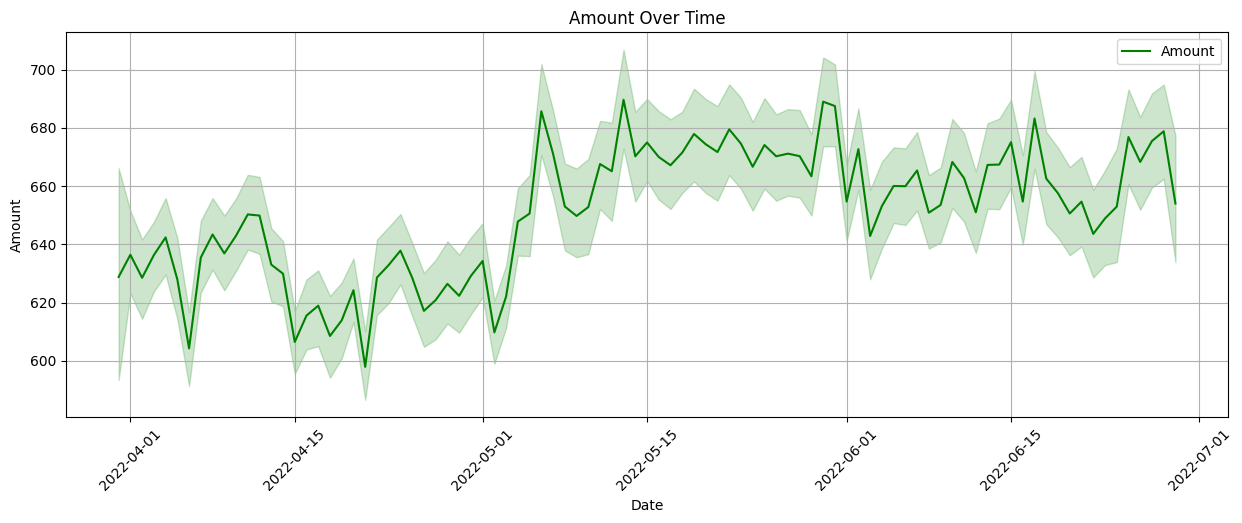

In [31]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Amount', label='Amount', color='green')
plt.title('Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

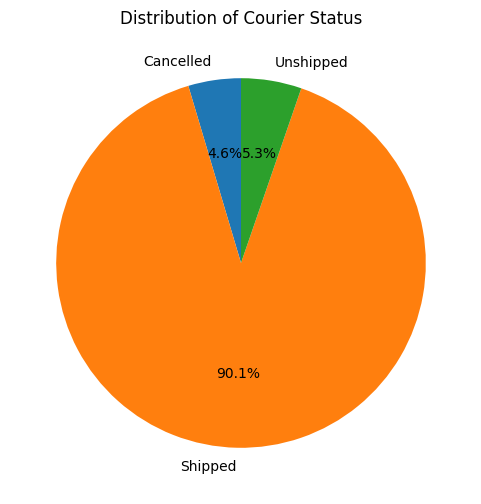

In [32]:
courier_data = df.groupby('Courier_Status')['Amount'].sum()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(courier_data, labels=courier_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Courier Status')
plt.show()

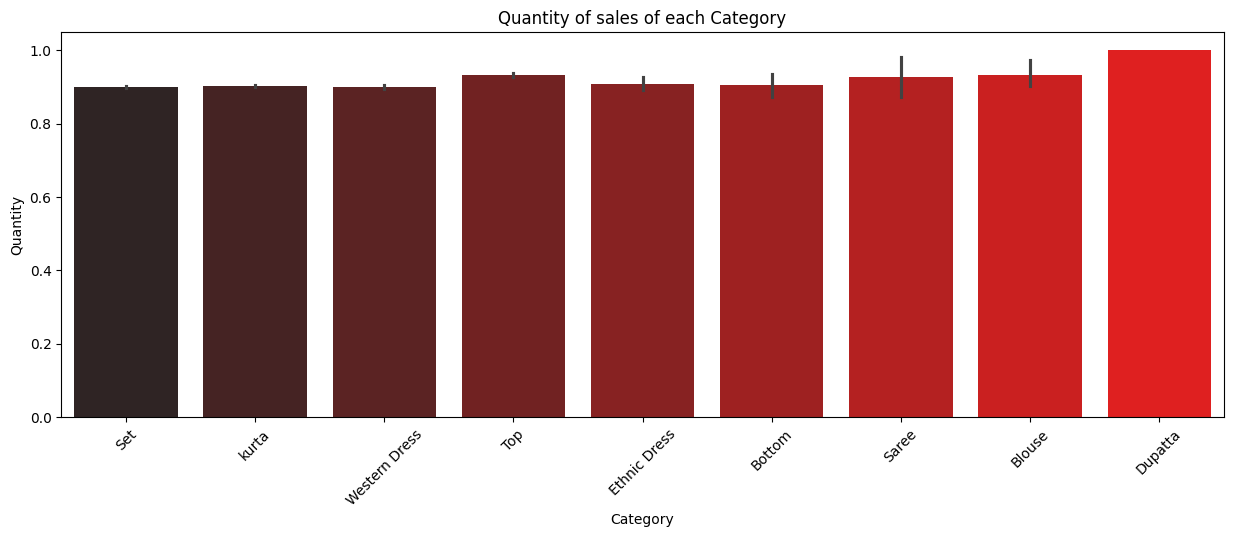

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Category',y='Qty',data=df,palette="dark:red")
plt.title('Quantity of sales of each Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

warnings.filterwarnings("ignore")


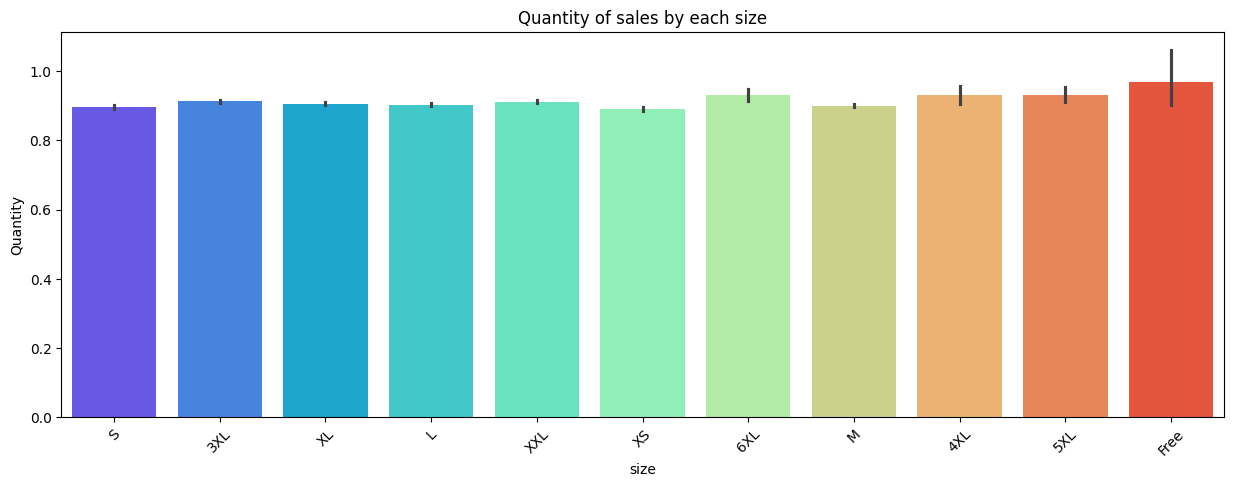

In [34]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Size", y="Qty", data=df, palette ='rainbow', hue="Size")
plt.title('Quantity of sales by each size')
plt.xlabel('size')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

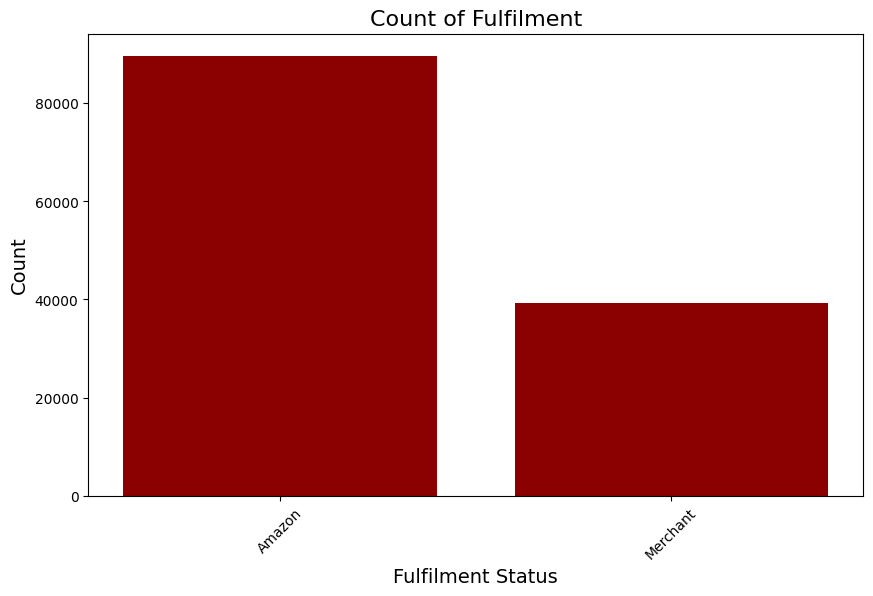

In [35]:
count_data = df['Fulfilment'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(count_data.index, count_data.values, color='darkred')
plt.title('Count of Fulfilment', fontsize=16)
plt.xlabel('Fulfilment Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()



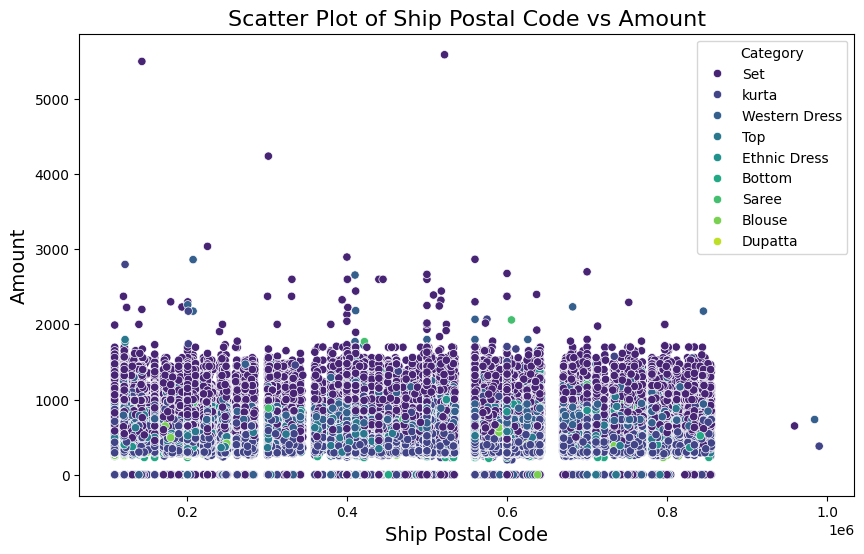

In [36]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ship-postal-code', y='Amount',  hue='Category', data=df, palette='viridis', sizes=(50, 200))

# Adding title and labels
plt.title('Scatter Plot of Ship Postal Code vs Amount', fontsize=16)
plt.xlabel('Ship Postal Code', fontsize=14)
plt.ylabel('Amount', fontsize=14)

# Show legend
plt.legend(title='Category')

# Show the plot
plt.show()

In [40]:
fig = px.bar(df, x="Date", y="B2B", color="Category", hover_name="Size", color_continuous_scale="ice")
fig.show()